## Importing packages

In [1]:
import io
import requests
import os
import sys
import math
import numpy as np  
import pandas as pd
import matplotlib.pyplot as plt
import pickle
import seaborn as sns
import random
import copy
import multiprocessing as mp
import random
import matplotlib.patches as mpatches
%matplotlib inline

## Loading results

Downloading datasets

In [2]:
dataset_names=['abalone','ailerons','bank32nh','cal_housing','cpu_act','delta_ailerons',
               'elevators', 'fried_delve','puma32H', 'winequality' ]

In [3]:
B=75

Loading

In [4]:
labels={'reg':'Regression','class':'Classification'}

In [5]:
experiments_true1_output = {}
experiments_true2_output = {}
experiments_0_output = {}
experiments_1_output = {}
experiments_2_output = {}
experiments_3_output = {}
experiments_4_output = {}
experiments_5_output = {}

In [6]:
for xp in ['reg','class']:
   
    with open('outputs/experiments_true1_output_'+xp+'.pkl', 'rb') as f:
        experiments_true1_output[xp] = pickle.load(f)

    with open('outputs/experiments_0_output_'+xp+'.pkl', 'rb') as f:
        experiments_0_output[xp] = pickle.load(f)

    with open('outputs/experiments_1_output_'+xp+'.pkl', 'rb') as f:
        experiments_1_output[xp] = pickle.load(f)

    with open('outputs/experiments_4_output_'+xp+'.pkl', 'rb') as f:
        experiments_4_output[xp] = pickle.load(f)

# Results

## Table Number of Vars

N Original Vars

In [7]:
nvars_original={}
nvars_original["abalone"]=[7,32]
nvars_original["ailerons"]=[40,40]
nvars_original["bank32nh"]=[32,32]
nvars_original["cal_housing"]=[8,32]
nvars_original["cpu_act"]=[21,32]
nvars_original["delta_ailerons"]=[5,32]
nvars_original["elevators"]=[18,32]
nvars_original["fried_delve"]=[10,32]
nvars_original["puma32H"]=[32,32]
nvars_original["winequality"]=[11,32]

N Selected Vars

In [8]:
nvars={}
stds_nvars={}

for xp in ['reg','class']:
    nvars[xp]={}
    stds_nvars[xp]={}
    
    for name in dataset_names: 

        nvars_aux=[]

        for b in range(B):

            index_experiment_4 = experiments_4_output[xp][name][:,0]==b
            experiment_4_nvars = experiments_4_output[xp][name][index_experiment_4,4][0]

            nvars_aux.append(experiment_4_nvars)

        nvars_aux=np.array(nvars_aux)

        nvars[xp][name]=np.mean(nvars_aux, axis=0).tolist()
        stds_nvars[xp][name]=np.std(nvars_aux, axis=0).tolist()

In [9]:
print("\\begin{table}[h] \n",
      "\centering \n",
      '\caption{text} \n',
      '\label{tab:nvars}% \n',
      "\\resizebox{\columnwidth}{!}{% \n",
      '\\begin{tabular}{ccccc} \n',
      '\\hline \n',
      ' Dataset & Original & Augment. & Selected (Reg) & Selected (Class) \\\ \n',
      '\\hline \n')

for name in dataset_names:  

    print(name.replace("_", " ") + ' & $ {} $ & $ {} $ & $ {:.02f}  \pm  {:.02f} $ & $ {:.02f}  \pm  {:.02f} $  \\\ '.format(nvars_original[name][0], nvars_original[name][1], nvars['reg'][name], stds_nvars['reg'][name], nvars['class'][name], stds_nvars['class'][name]))

    
print('\n \\hline \n',
      '\end{tabular}% \n',
      '} \n',
      '\end{table}% \n')

\begin{table}[h] 
 \centering 
 \caption{text} 
 \label{tab:nvars}% 
 \resizebox{\columnwidth}{!}{% 
 \begin{tabular}{ccccc} 
 \hline 
  Dataset & Original & Augment. & Selected (Reg) & Selected (Class) \\ 
 \hline 

abalone & $ 7 $ & $ 32 $ & $ 4.19  \pm  1.26 $ & $ 9.87  \pm  5.64 $  \\ 
ailerons & $ 40 $ & $ 40 $ & $ 5.16  \pm  0.54 $ & $ 3.79  \pm  0.64 $  \\ 
bank32nh & $ 32 $ & $ 32 $ & $ 10.00  \pm  1.82 $ & $ 13.91  \pm  0.61 $  \\ 
cal housing & $ 8 $ & $ 32 $ & $ 5.29  \pm  1.29 $ & $ 7.45  \pm  4.92 $  \\ 
cpu act & $ 21 $ & $ 32 $ & $ 9.88  \pm  1.20 $ & $ 2.56  \pm  0.72 $  \\ 
delta ailerons & $ 5 $ & $ 32 $ & $ 3.16  \pm  0.49 $ & $ 3.75  \pm  0.63 $  \\ 
elevators & $ 18 $ & $ 32 $ & $ 7.97  \pm  1.11 $ & $ 13.08  \pm  2.16 $  \\ 
fried delve & $ 10 $ & $ 32 $ & $ 4.45  \pm  0.50 $ & $ 5.00  \pm  0.00 $  \\ 
puma32H & $ 32 $ & $ 32 $ & $ 1.88  \pm  0.32 $ & $ 14.00  \pm  0.00 $  \\ 
winequality & $ 11 $ & $ 32 $ & $ 9.60  \pm  1.02 $ & $ 14.00  \pm  0.00 $  \\ 

 \hline

## Tabela 1

Errors

In [10]:
errors={}
stds_errors={}

for xp in ['reg','class']:
    errors[xp]={}
    stds_errors[xp]={}

    for name in dataset_names: 

        errors_aux=[]

        for b in range(B):

            index_experiment_0 = experiments_0_output[xp][name][:,0]==b
            experiment_0_error = experiments_0_output[xp][name][index_experiment_0,1][0]
            
            #
            index_experiment_true1 = experiments_true1_output[xp][name][:,0]==b
            experiment_true1_error = experiments_true1_output[xp][name][index_experiment_true1,1][0]

            #
            index_experiment_1 = experiments_1_output[xp][name][:,0]==b
            experiment_1_error = experiments_1_output[xp][name][index_experiment_1,1][0]

            #
            index_experiment_4 = experiments_4_output[xp][name][:,0]==b
            experiment_4_error = experiments_4_output[xp][name][index_experiment_4,1][0]

            #
            errors_aux.append([experiment_0_error/experiment_0_error, experiment_true1_error/experiment_0_error, experiment_1_error/experiment_0_error, experiment_4_error/experiment_0_error])

        errors_aux=np.array(errors_aux)

        errors[xp][name]=np.mean(errors_aux, axis=0).tolist()
        stds_errors[xp][name]=np.std(errors_aux, axis=0).tolist()

#errors[xp], stds_errors[xp]

In [11]:
print("\\begin{table*}[h] \n",
      "\centering \n",
      '\caption{text} \n',
      '\label{tab:performance}% \n',
      '\\resizebox{503}{!}{ \n',
      '\\begin{tabular}{cccccc} \n',
      '\\hline \n',
      '\multicolumn{1}{c}{} & \multicolumn{1}{c}{} & \multicolumn{3}{c}{All features} & \multicolumn{1}{c}{Selected features}  \\\ \n',
      '\\hline \n',
      ' & Dataset & Unweighted & True weights & Estimated weights  & Estimated weights  \\\ \n')   
  
for xp in ['reg','class']:   
    for name in dataset_names:  
        if name=='abalone': print("\hline \n \\multirow{10}{*}{\\rotatebox[origin=c]{90}{"+labels[xp]+"}} & " + name.replace("_", " ")) 
        else: print("& " + name.replace("_", " ")) 

        print('& $ {:.2f} $ & $ {:.2f}  \pm  {:.2f} $ & $ {:.2f}  \pm {:.2f} $ & $ {:.2f}  \pm  {:.2f} $ \\\ '.format(errors[xp][name][0], errors[xp][name][1], stds_errors[xp][name][1], errors[xp][name][2], stds_errors[xp][name][2], errors[xp][name][3], stds_errors[xp][name][3]))

      
print('\n \\hline \n',
      '\end{tabular}% \n',
      '} \n',
      '\end{table*}% \n')

\begin{table*}[h] 
 \centering 
 \caption{text} 
 \label{tab:performance}% 
 \resizebox{503}{!}{ 
 \begin{tabular}{cccccc} 
 \hline 
 \multicolumn{1}{c}{} & \multicolumn{1}{c}{} & \multicolumn{3}{c}{All features} & \multicolumn{1}{c}{Selected features}  \\ 
 \hline 
  & Dataset & Unweighted & True weights & Estimated weights  & Estimated weights  \\ 

\hline 
 \multirow{10}{*}{\rotatebox[origin=c]{90}{Regression}} & abalone
& $ 1.00 $ & $ 1.42  \pm  0.24 $ & $ 1.25  \pm 0.19 $ & $ 0.92  \pm  0.07 $ \\ 
& ailerons
& $ 1.00 $ & $ 1.01  \pm  0.13 $ & $ 0.99  \pm 0.11 $ & $ 0.87  \pm  0.11 $ \\ 
& bank32nh
& $ 1.00 $ & $ 1.29  \pm  0.14 $ & $ 1.20  \pm 0.11 $ & $ 0.98  \pm  0.06 $ \\ 
& cal housing
& $ 1.00 $ & $ 1.50  \pm  0.24 $ & $ 1.35  \pm 0.20 $ & $ 0.84  \pm  0.09 $ \\ 
& cpu act
& $ 1.00 $ & $ 0.52  \pm  0.55 $ & $ 0.55  \pm 0.59 $ & $ 0.15  \pm  0.21 $ \\ 
& delta ailerons
& $ 1.00 $ & $ 1.39  \pm  0.18 $ & $ 1.25  \pm 0.12 $ & $ 0.92  \pm  0.06 $ \\ 
& elevators
& $ 1.00 $ & $ 1.

# Plots

In [12]:
ess={}

for xp in ['reg','class']:
    ess[xp]={}
    
    ess[xp][0]=[]
    ess[xp][2]=[]
    ess[xp][4]=[]

    for name in dataset_names: 

        for b in range(B):

            index_experiment_true1 = experiments_true1_output[xp][name][:,0]==b
            ess[xp][0].append(experiments_true1_output[xp][name][index_experiment_true1,3][0])

            index_experiment_1 = experiments_1_output[xp][name][:,0]==b
            ess[xp][2].append( experiments_1_output[xp][name][index_experiment_1,3][0])

            index_experiment_4 = experiments_4_output[xp][name][:,0]==b
            ess[xp][4].append(experiments_4_output[xp][name][index_experiment_4,3][0])

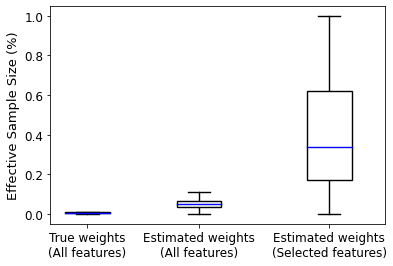

In [13]:
xp1='class'
xp2='reg'

wid=1.4

box_plot_data=[ess[xp1][0]+ess[xp2][0],ess[xp1][2]+ess[xp2][2],ess[xp1][4]+ess[xp2][4]]
bp = plt.boxplot(box_plot_data, sym="", patch_artist=True, widths=.6, positions=[1,2.5,4.25])

## change color and linewidth of the whiskers
for whisker in bp['whiskers']:
    whisker.set(color='k', linewidth=wid)
    
## change outline color, fill color and linewidth of the boxes
for box in bp['boxes']:
    # change outline color
    box.set(color='k', linewidth=wid)
    # change fill color
    box.set( facecolor = 'w' )
    
## change color and linewidth of the caps
for cap in bp['caps']:
    cap.set(color='k', linewidth=wid)
    
## change color and linewidth of the medians
for median in bp['medians']:
    median.set(color='b', linewidth=wid)

plt.xlim((.5,5))
plt.ylabel('Effective Sample Size (%)', size=13)
plt.yticks(size=12)
plt.xticks([1, 2.5, 4.25], ['True weights\n(All features)', 'Estimated weights\n(All features)', 'Estimated weights\n(Selected features)'], size=12)

###########################################################################

plt.savefig('plots/boxplot.png', bbox_inches='tight',dpi=300, transparent=True) #, 
plt.show()